<a href="https://colab.research.google.com/github/DataEtnos/Projeto---modelos-de-classifica-o-/blob/projeto-machine/Modelos_de_classifica%C3%A7%C3%A3o_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yellowbrick
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from yellowbrick.model_selection import FeatureImportances

import matplotlib.pyplot as plt
from  sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df= pd.read_excel("/content/churn_data.xlsx")

In [ ]:
#Visualizando os dados
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(['customerID'], axis=1)

In [ ]:
#Contando a quantidade de churns
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [ ]:
#verifcando se tem nulos e 0 tipo de cada item
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
#verificando a distribuição dos dados pelo porcentil , contagem media e desvio padrão
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_original =   df.copy()

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
x= df.drop(['Churn'], axis=1)
y= df['Churn']

In [ ]:
x = pd.get_dummies(x)

In [ ]:
le = LabelEncoder()

y = le.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
 lr = LogisticRegression()


 lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_test, y_test)

0.7966824644549763

In [ ]:
lr.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x = pd.DataFrame(x)

In [ ]:
#Metricas


Prediction_teste = lr.predict(x_test)
precdiction_treino = lr.predict(x_train)

acuracia = accuracy_score(y_test,Prediction_teste  )
acuracia_treino = accuracy_score(y_train, precdiction_treino)

f1 = f1_score(y_test, Prediction_teste)
f1_treino = f1_score(y_train, precdiction_treino)

precision = precision_score(y_test, Prediction_teste )
precision_treino = precision_score(y_train, precdiction_treino)

recall_treino = recall_score(y_train,precdiction_treino)
recall = recall_score(y_test, Prediction_teste )


print("---- Metricas----")
print(f"Acuracia teste: {acuracia*100:.2f}%")
print(f"Acuracia treino: {acuracia_treino*100:.2f}%")
print("------------------------------------")
print(f"f1 score teste: {f1*100:.2f}%")
print(f"f1 score treino: {f1_treino*100:.2f}%")

print("------------------------------------")
print(f"precision teste: {precision*100:.2f}%")
print(f"precision treino: {precision_treino*100:.2f}%")
print("------------------------------------")
print(f"recall teste: {recall*100:.2f}%")
print(f"recall treino: {recall_treino*100:.2f}%")


---- Metricas----
Acuracia teste: 79.67%
Acuracia treino: 80.76%
------------------------------------
f1 score teste: 58.31%
f1 score treino: 60.98%
------------------------------------
precision teste: 64.10%
precision treino: 66.13%
------------------------------------
recall teste: 53.48%
recall treino: 56.57%


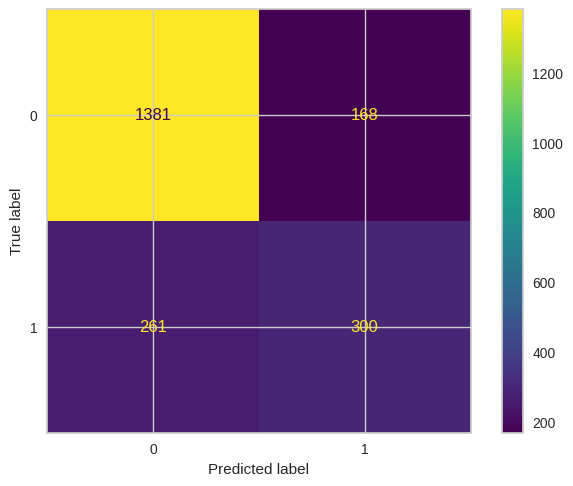

In [ ]:
cm = confusion_matrix(y_test, lr.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
dt = DecisionTreeClassifier(
  class_weight = None,
  max_depth = None,
  max_features = None,
  max_leaf_nodes = None,
  min_impurity_decrease = 0.0,
  min_samples_split = 2,
  min_samples_leaf =1,
  min_weight_fraction_leaf = 0.0,
  random_state = None,
  criterion ='gini'


)

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_test, y_test)

0.7251184834123223

In [ ]:
#Metricas


Prediction_teste = dt.predict(x_test)
precdiction_treino = dt.predict(x_train)

acuracia = accuracy_score(y_test,Prediction_teste  )
acuracia_treino = accuracy_score(y_train, precdiction_treino)

f1 = f1_score(y_test, Prediction_teste)
f1_treino = f1_score(y_train, precdiction_treino)

precision = precision_score(y_test, Prediction_teste )
precision_treino = precision_score(y_train, precdiction_treino)

recall_treino = recall_score(y_train,precdiction_treino)
recall = recall_score(y_test, Prediction_teste )


print("---- Metricas----")
print(f"Acuracia teste: {acuracia*100:.2f}%")
print(f"Acuracia treino: {acuracia_treino*100:.2f}%")
print("------------------------------------")
print(f"f1 score teste: {f1*100:.2f}%")
print(f"f1 score treino: {f1_treino*100:.2f}%")

print("------------------------------------")
print(f"precision teste: {precision*100:.2f}%")
print(f"precision treino: {precision_treino*100:.2f}%")
print("------------------------------------")
print(f"recall teste: {recall*100:.2f}%")
print(f"recall treino: {recall_treino*100:.2f}%")


---- Metricas----
Acuracia teste: 72.51%
Acuracia treino: 99.86%
------------------------------------
f1 score teste: 49.39%
f1 score treino: 99.73%
------------------------------------
precision teste: 48.38%
precision treino: 99.92%
------------------------------------
recall teste: 50.45%
recall treino: 99.54%


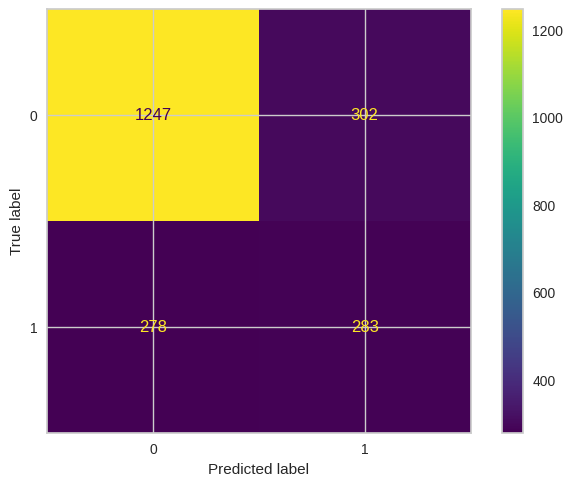

In [ ]:
cm = confusion_matrix(y_test, dt.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(x_test, y_test)

0.7796208530805687

In [ ]:
#Metricas


Prediction_teste = rf.predict(x_test)
precdiction_treino = rf.predict(x_train)

acuracia = accuracy_score(y_test,Prediction_teste  )
acuracia_treino = accuracy_score(y_train, precdiction_treino)

f1 = f1_score(y_test, Prediction_teste)
f1_treino = f1_score(y_train, precdiction_treino)

precision = precision_score(y_test, Prediction_teste )
precision_treino = precision_score(y_train, precdiction_treino)

recall_treino = recall_score(y_train,precdiction_treino)
recall = recall_score(y_test, Prediction_teste )


print("---- Metricas----")
print(f"Acuracia teste: {acuracia*100:.2f}%")
print(f"Acuracia treino: {acuracia_treino*100:.2f}%")
print("------------------------------------")
print(f"f1 score teste: {f1*100:.2f}%")
print(f"f1 score treino: {f1_treino*100:.2f}%")

print("------------------------------------")
print(f"precision teste: {precision*100:.2f}%")
print(f"precision treino: {precision_treino*100:.2f}%")
print("------------------------------------")
print(f"recall teste: {recall*100:.2f}%")
print(f"recall treino: {recall_treino*100:.2f}%")


---- Metricas----
Acuracia teste: 77.96%
Acuracia treino: 99.86%
------------------------------------
f1 score teste: 53.17%
f1 score treino: 99.73%
------------------------------------
precision teste: 61.11%
precision treino: 99.69%
------------------------------------
recall teste: 47.06%
recall treino: 99.77%


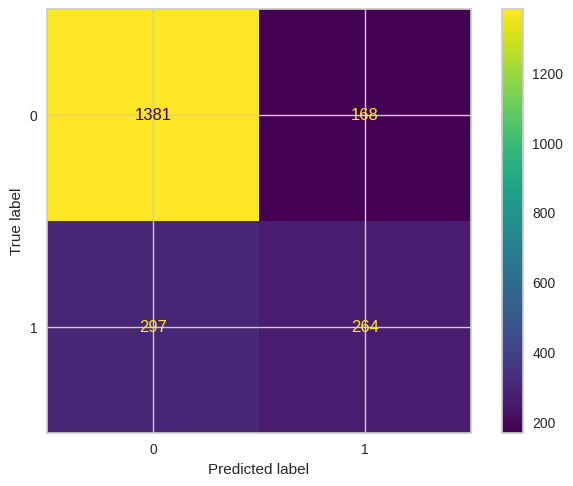

In [ ]:
cm = confusion_matrix(y_test, rf.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#GRID SEARCH

-  Tunagem da metricas.


- Anotação : percebi que é muito melhor e mais rapido setar os param_grid em bibliotecas


In [ ]:
param_grid = [
    {'penalty': ['l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [200]},
    {'penalty': ['elasticnet'], 'C': [0.1, 1], 'solver': ['saga'], 'max_iter': [200], 'l1_ratio': [0.5]},
]



In [ ]:
grid_search = GridSearchCV(lr,param_grid,scoring='recall',cv=5 , n_jobs = -1)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'max_iter': [200],
                          'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']},
                         {'C': [0.1, 1], 'l1_ratio': [0.5], 'max_iter': [200],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='recall')

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by ='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.088941,0.027788,0.020334,0.009683,10,200,l2,liblinear,NaN,"{'C': 10, 'max_iter': 200, 'penalty': 'l2', 's...",0.530534,0.549618,0.538168,0.563218,0.601533,0.556614,0.025023,1
3,0.248464,0.113750,0.019892,0.008350,1,200,l2,lbfgs,NaN,"{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'so...",0.541985,0.549618,0.534351,0.578544,0.578544,0.556608,0.018550,2
5,0.281227,0.083799,0.019096,0.003610,10,200,l2,lbfgs,NaN,"{'C': 10, 'max_iter': 200, 'penalty': 'l2', 's...",0.538168,0.549618,0.534351,0.567050,0.590038,0.555845,0.020533,3
2,0.106251,0.042014,0.016930,0.011411,1,200,l2,liblinear,NaN,"{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'so...",0.534351,0.545802,0.538168,0.563218,0.590038,0.554315,0.020431,4
0,0.148513,0.035457,0.019098,0.008341,0.1,200,l2,liblinear,NaN,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', '...",0.541985,0.534351,0.530534,0.555556,0.590038,0.550493,0.021544,5
1,0.331573,0.100459,0.015844,0.006485,0.1,200,l2,lbfgs,NaN,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', '...",0.541985,0.538168,0.534351,0.555556,0.582375,0.550487,0.017476,6
6,2.961011,0.868147,0.021024,0.009682,0.1,200,elasticnet,saga,0.5,"{'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 200, '...",0.488550,0.511450,0.591603,0.494253,0.528736,0.522918,0.037110,7
7,4.336603,0.248249,0.023157,0.007834,1,200,elasticnet,saga,0.5,"{'C': 1, 'l1_ratio': 0.5, 'max_iter': 200, 'pe...",0.488550,0.511450,0.591603,0.494253,0.528736,0.522918,0.037110,7


In [ ]:
 grid_search.best_estimator_.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
lr_tunado = LogisticRegression(
  C=10,
 class_weight= None,
 dual=False,
 fit_intercept=True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 200,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'liblinear',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

lr_tunado.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=200, solver='liblinear')

In [ ]:
#Metricas


Prediction_teste = lr_tunado.predict(x_test)
precdiction_treino = lr_tunado.predict(x_train)

acuracia = accuracy_score(y_test,Prediction_teste  )
acuracia_treino = accuracy_score(y_train, precdiction_treino)

f1 = f1_score(y_test, Prediction_teste)
f1_treino = f1_score(y_train, precdiction_treino)

precision = precision_score(y_test, Prediction_teste )
precision_treino = precision_score(y_train, precdiction_treino)

recall_treino = recall_score(y_train,precdiction_treino)
recall = recall_score(y_test, Prediction_teste )


print("---- Metricas----")
print(f"Acuracia teste: {acuracia*100:.2f}%")
print(f"Acuracia treino: {acuracia_treino*100:.2f}%")
print("------------------------------------")
print(f"f1 score teste: {f1*100:.2f}%")
print(f"f1 score treino: {f1_treino*100:.2f}%")

print("------------------------------------")
print(f"precision teste: {precision*100:.2f}%")
print(f"precision treino: {precision_treino*100:.2f}%")
print("------------------------------------")
print(f"recall teste: {recall*100:.2f}%")
print(f"recall treino: {recall_treino*100:.2f}%")


---- Metricas----
Acuracia teste: 79.53%
Acuracia treino: 80.66%
------------------------------------
f1 score teste: 58.06%
f1 score treino: 60.69%
------------------------------------
precision teste: 63.75%
precision treino: 65.98%
------------------------------------
recall teste: 53.30%
recall treino: 56.19%


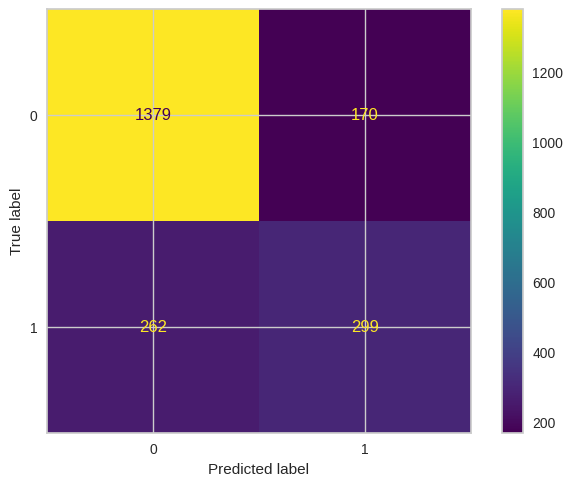

In [ ]:
cm = confusion_matrix(y_test, lr_tunado.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    "n_estimators": [100,300,500],
}

scoring = ['accuracy', 'recall']


grid_search = GridSearchCV(rf,parameters , scoring= scoring,cv=5 , n_jobs = -1, refit = 'accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             refit='accuracy', scoring=['accuracy', 'recall'])

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by ='rank_test_accuracy')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
15,0.667755,0.142074,0.041453,0.009981,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.790863,0.796954,0.796748,...,0.012457,1,0.450382,0.488550,0.477099,0.494253,0.547893,0.491635,0.031920,13
19,1.775646,0.039323,0.088559,0.001780,7,300,"{'max_depth': 7, 'n_estimators': 300}",0.797970,0.789848,0.798780,...,0.010827,2,0.473282,0.492366,0.507634,0.501916,0.559387,0.506917,0.028711,12
26,4.466263,1.169034,0.260598,0.192491,9,500,"{'max_depth': 9, 'n_estimators': 500}",0.805076,0.788832,0.795732,...,0.010501,3,0.515267,0.507634,0.526718,0.524904,0.570881,0.529081,0.022005,1
20,3.934936,0.804002,0.202729,0.075523,7,500,"{'max_depth': 7, 'n_estimators': 500}",0.795939,0.796954,0.792683,...,0.009855,4,0.477099,0.500000,0.492366,0.513410,0.555556,0.507686,0.026659,11
18,0.721884,0.239543,0.036286,0.001840,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.802030,0.792893,0.793699,...,0.008801,5,0.473282,0.500000,0.500000,0.517241,0.555556,0.509216,0.027103,10
22,1.947058,0.009306,0.095992,0.002256,8,300,"{'max_depth': 8, 'n_estimators': 300}",0.803046,0.798985,0.790650,...,0.008221,6,0.507634,0.503817,0.496183,0.509579,0.559387,0.515320,0.022505,9
12,0.517293,0.012454,0.031809,0.000417,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.800000,0.791878,0.792683,...,0.010951,7,0.458015,0.442748,0.442748,0.463602,0.501916,0.461806,0.021692,16
17,3.714800,0.693056,0.183995,0.065009,6,500,"{'max_depth': 6, 'n_estimators': 500}",0.792893,0.792893,0.791667,...,0.011480,8,0.458015,0.480916,0.465649,0.505747,0.540230,0.490111,0.029898,14
23,4.193811,0.742767,0.201383,0.065060,8,500,"{'max_depth': 8, 'n_estimators': 500}",0.801015,0.787817,0.792683,...,0.011418,9,0.500000,0.507634,0.511450,0.517241,0.563218,0.519909,0.022367,5
21,0.636704,0.014702,0.037039,0.000381,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.802030,0.786802,0.791667,...,0.011327,9,0.503817,0.500000,0.507634,0.517241,0.567050,0.519148,0.024627,6


In [ ]:
 grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_tunada = RandomForestClassifier(
  bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 7,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False
)
rf_tunada.fit(x_train, y_train)

RandomForestClassifier(max_depth=7)

In [ ]:
#Metricas


Prediction_teste = rf_tunada.predict(x_test)
precdiction_treino = rf_tunada.predict(x_train)

acuracia = accuracy_score(y_test,Prediction_teste  )
acuracia_treino = accuracy_score(y_train, precdiction_treino)

f1 = f1_score(y_test, Prediction_teste)
f1_treino = f1_score(y_train, precdiction_treino)

precision = precision_score(y_test, Prediction_teste )
precision_treino = precision_score(y_train, precdiction_treino)

recall_treino = recall_score(y_train,precdiction_treino)
recall = recall_score(y_test, Prediction_teste )


print("---- Metricas----")
print(f"Acuracia teste  Tunada : {acuracia*100:.2f}%")
print(f"Acuracia treino  Tunada : {acuracia_treino*100:.2f}%")
print("------------------------------------")
print(f"f1 score teste  Tunada : {f1*100:.2f}%")
print(f"f1 score treino  Tunada : {f1_treino*100:.2f}%")

print("------------------------------------")
print(f"precision teste  Tunada : {precision*100:.2f}%")
print(f"precision treino  Tunada : {precision_treino*100:.2f}%")
print("------------------------------------")
print(f"recall teste Tunada : {recall*100:.2f}%")
print(f"recall treino  Tunada : {recall_treino*100:.2f}%")

print("------------------------------------")

---- Metricas----
Acuracia teste  Tunada : 79.57%
Acuracia treino  Tunada : 82.53%
------------------------------------
f1 score teste  Tunada : 55.43%
f1 score treino  Tunada : 62.74%
------------------------------------
precision teste  Tunada : 66.01%
precision treino  Tunada : 72.40%
------------------------------------
recall teste Tunada : 47.77%
recall treino  Tunada : 55.35%
------------------------------------


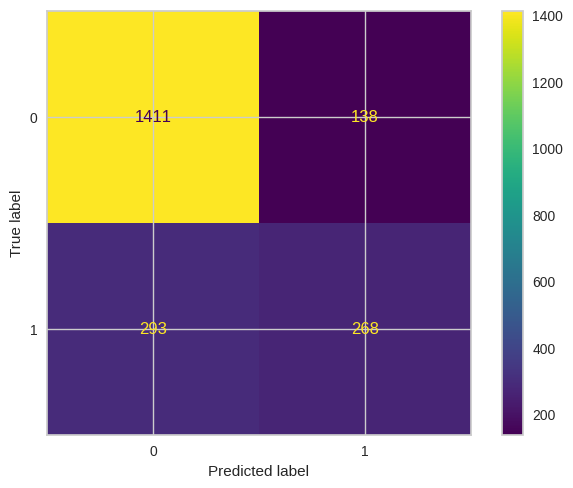

In [ ]:
cm = confusion_matrix(y_test, rf_tunada.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
predição_lr = lr_tunado.predict(x_test)
predição_dt = dt.predict(x_test)
predição_rf = rf_tunada.predict(x_test)

In [ ]:
predição_logr = pd.DataFrame(predição_lr, columns= ["predição_lr"])
predição_tree = pd.DataFrame(predição_dt, columns= ["predição_dt"])
predição_rf = pd.DataFrame(predição_rf, columns= ["predição_rf"])

In [ ]:
df_original = pd.concat([df_original, predição_logr, predição_tree, predição_rf], axis=1)

In [ ]:
df_original.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predição_lr,predição_dt,predição_rf
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.0,0.0,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,0.0,0.0,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,1.0,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.0,0.0,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.0,1.0,0.0


In [ ]:
df_original.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df_original.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df_original.dropna(inplace=True)
df_original = df_original.dropna(how='all')

In [ ]:
df_original.isna().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df_original.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
